In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/usarrests/USArrests.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
#Standartlaştırma işlemi
sc=MinMaxScaler((0,1))
df=sc.fit_transform(df)

In [5]:
#Birleştirici bir kümele yöntemi
hc_avg=linkage(df,"average")

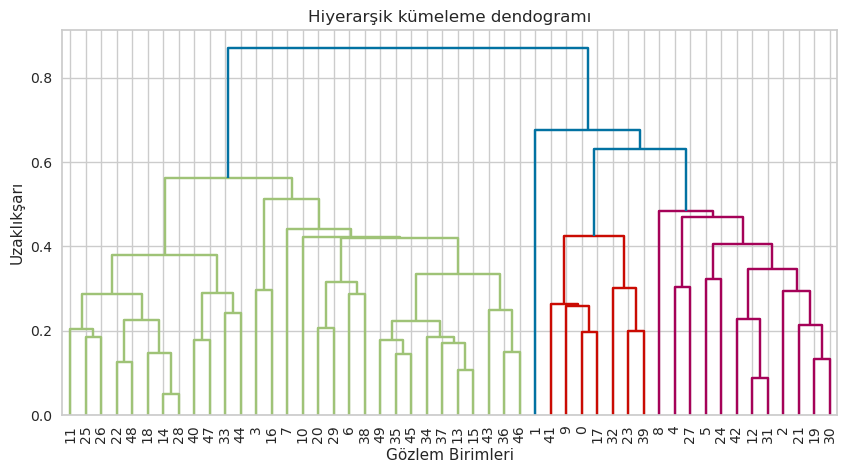

In [6]:
#Görsel çıkarımı
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıkşarı")
dendrogram(hc_avg,
          leaf_font_size=10)
plt.show()

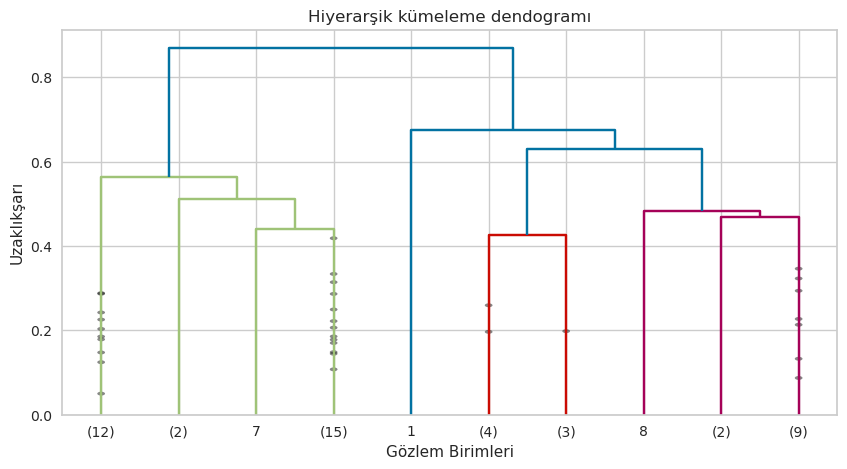

In [7]:
#Sadeleştirilmiş Görsel çıkarımı
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıkşarı")
dendrogram(hc_avg,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
          leaf_font_size=10)
plt.show()

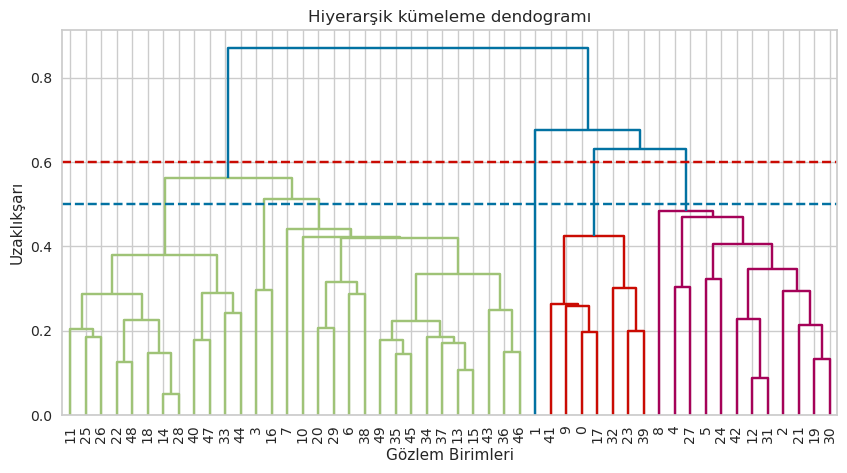

In [8]:
#Küme Sayısı Belirleme
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik kümeleme dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıkşarı")
dend=dendrogram(hc_avg,
          leaf_font_size=10)
plt.axhline(y=0.6, color="r", linestyle="--")
plt.axhline(y=0.5, color="b", linestyle="--")
plt.show()

In [9]:
#Final Model
cluster=AgglomerativeClustering(n_clusters=5,linkage="average")

In [10]:
clusters= cluster.fit_predict(df)

In [11]:
df=pd.read_csv("/kaggle/input/usarrests/USArrests.csv",index_col=0)
df["hierarchi_cluster"]=clusters+1

In [12]:
df.head()

,Murder,Assault,UrbanPop,Rape,hierarchi_cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2
